# 1. Introduction

## Arabic Text Classification without Labels

This notebook demonstrates how to classify Arabic text using unsupervised learning techniques. We will preprocess the text, extract features, and apply clustering algorithms to classify the text without using the provided labels.

# 2. Loading the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('arabic_dataset_classifiction.csv')

# Display the first few rows
df.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


# 3. Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Basic statistics and information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111728 entries, 0 to 111727
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    108789 non-null  object
 1   targe   111728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
df.describe()

,targe
count,111728.000000
mean,2.620659
std,1.451010
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,4.000000


In [6]:
# Handle missing values by filling NaNs with an empty string
df['text'] = df['text'].fillna('')

In [7]:
df.columns

Index(['text', 'targe'], dtype='object')

In [8]:
df['text_length'] = df['text'].apply(len)

In [9]:
print(df['text_length'].isna().sum())

0


In [10]:
print(df['text_length'].describe())

count    111728.000000
mean       1512.846878
std        1235.795710
min           0.000000
25%         720.000000
50%        1222.000000
75%        1943.000000
max       28083.000000
Name: text_length, dtype: float64


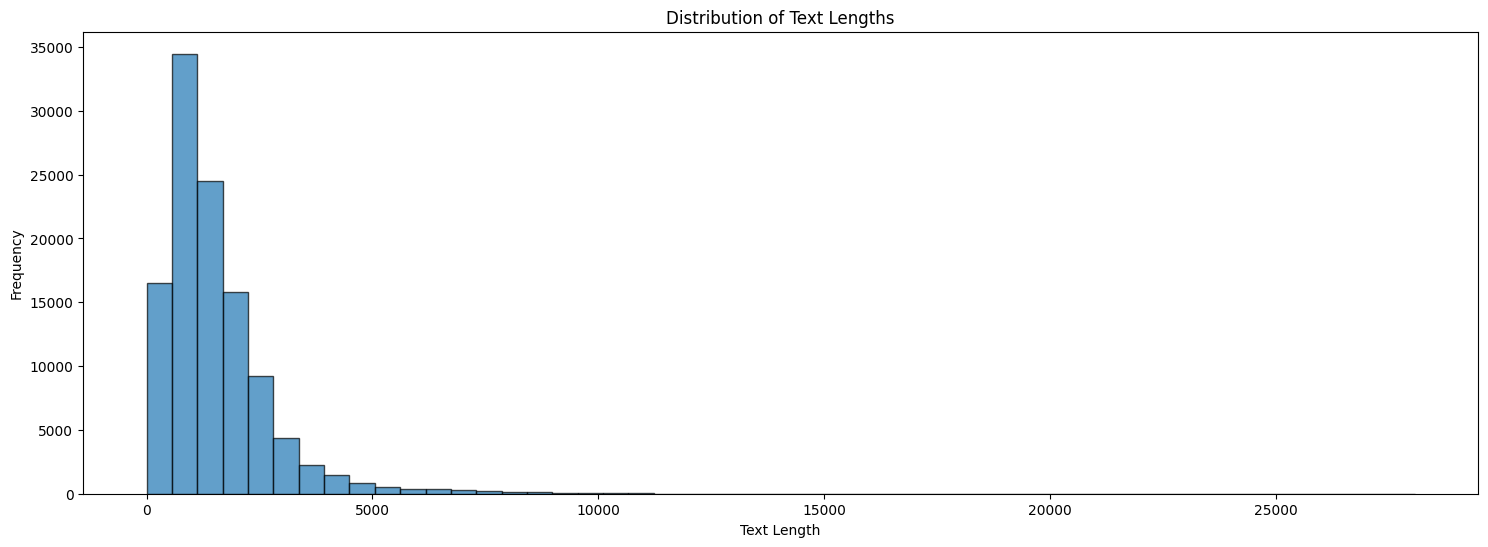

In [11]:
plt.figure(figsize=(18, 6))
plt.hist(df['text_length'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 4. Text Preprocessing

In [12]:
import re
import nltk
from nltk.corpus import stopwords

In [13]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'\d+|\W+', ' ', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in arabic_stopwords])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Skynet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,text,targe,text_length,cleaned_text
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,1890,أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ا...
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,464,قررت النجمة الأمريكية أوبرا وينفري يقتصر عملها...
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,939,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,1113,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,1431,تزال صناعة الجلود المغرب تتبع الطريقة التقليدي...


# 5. Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
# # Try different parameters for TF-IDF
# vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2), min_df=5)
# X = vectorizer.fit_transform(df['cleaned_text'])


In [17]:

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])

In [18]:
# Convert to a DataFrame for easier manipulation
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df

,آخر,آخرين,آسفي,آلاف,أبرز,أبطال,أثناء,أحمد,أخبار,أخبارنا,...,يقوم,يكن,يكون,يمكن,ينتظر,يوجد,يوسف,يوليوز,يوم,يوما
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.102353,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.147260,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.137990,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.073215,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.279253,0.320763,0.0
111724,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.053894,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
111725,0.048666,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
111726,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.193366,0.000000,0.0


# 6. Modeling KMeans

In [20]:
from sklearn.cluster import KMeans
import numpy as np

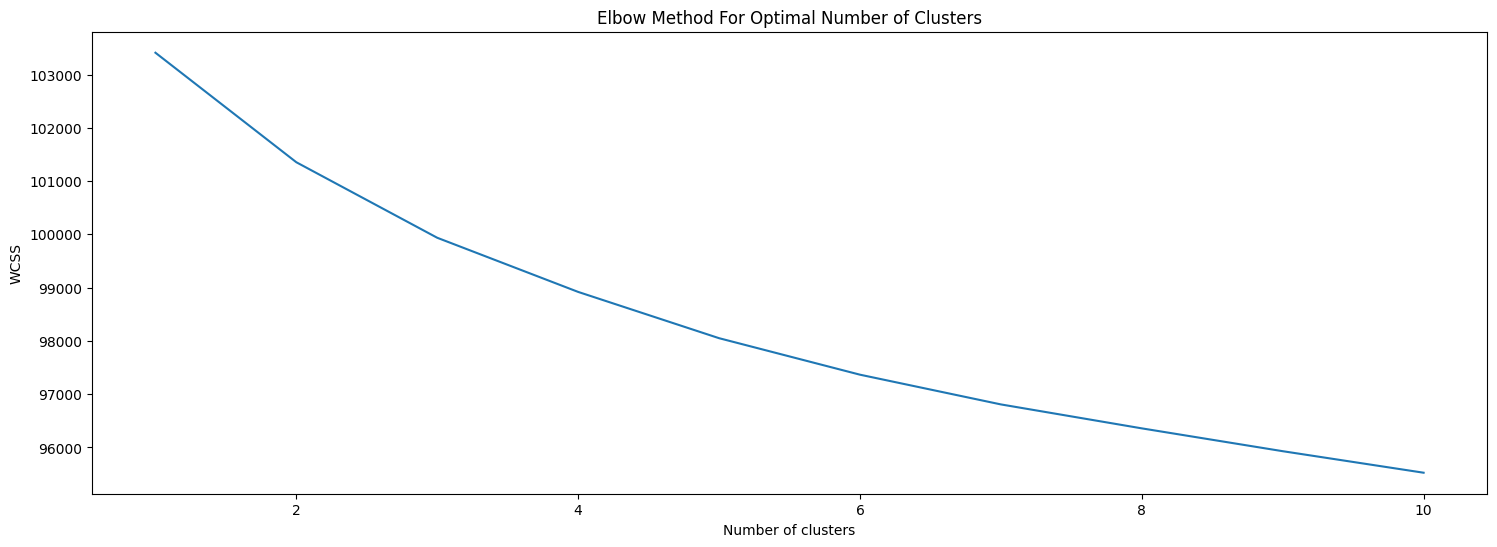

In [21]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(18, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

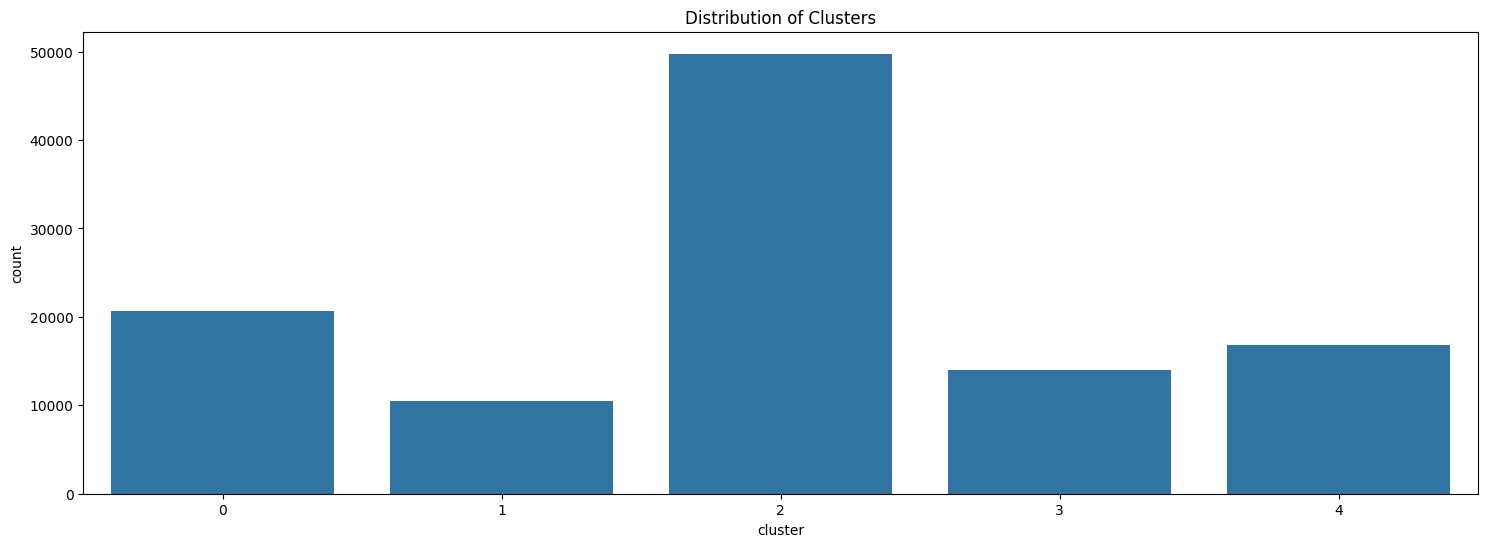


Cluster 0:
151     ترى النجمة إلهام شاهين إن وصول الفريق عبد الفت...
2542    أخبارنا المغربية عبد الرحيم مرزوقي بعد الفيديو...
2781    عبدالاله بوسحابة أخبارنا المغربية بعد فوز الود...
4128    مصطفى الصوفي توج شباب وداد طنجة بالجائزة الكبر...
5141    بعد أن انتقدت عرضه لجنة التحكيم أصبحت مسؤولية ...
Name: text, dtype: object

Cluster 1:
11     لا ختزل الصراع بين الإسلاميين والحداثيين في ال...
190    جمال مايس أخبارنا المغربية في خطوة تكتسي بعدا ...
207    عبدالاله بوسحابة أخبارنا المغربية حل أمس الثلا...
262    الأولى برهنت على قدرتها على تقديم منتوج جيد عن...
332    دق مهنيون في الإعلام ناقوس الخطر بشأن الاختلال...
Name: text, dtype: object

Cluster 2:
0    بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...
1    قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...
2    أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...
3    اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...
4    تزال صناعة الجلود في المغرب تتبع الطريقة التقل...
Name: text, dtype: object

Cluster 3:
40      أخبارنا المغربية

In [22]:
# Apply KMeans with the optimal number of clusters
optimal_clusters = 5  # Assume 5 for this example; determine from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_df)

# Visualize the clusters
plt.figure(figsize=(18, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Clusters')
plt.show()

# Display some text samples from each cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['text'].head(5))

# 7. Evaluation

In [23]:
#Evaluating Clustering Quality:

In [24]:
from sklearn.metrics import silhouette_score


In [25]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X_df, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.026091961055888475


In [26]:
#usinf different MOdeling DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

# Using DBSCAN as an alternative
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
df['cluster'] = dbscan.fit_predict(X)

In [28]:
#claclutae Davies-Bouldin Index

In [29]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X.toarray(), df['cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.3933722672702362


In [36]:
# #Perform Dimensionality Reduction:
# from sklearn.decomposition import PCA

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X.toarray())

# plt.figure(figsize=(10, 7))
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'])
# plt.title('2D PCA of Text Data')
# plt.show()




In [ ]:
# use confustion matrix 

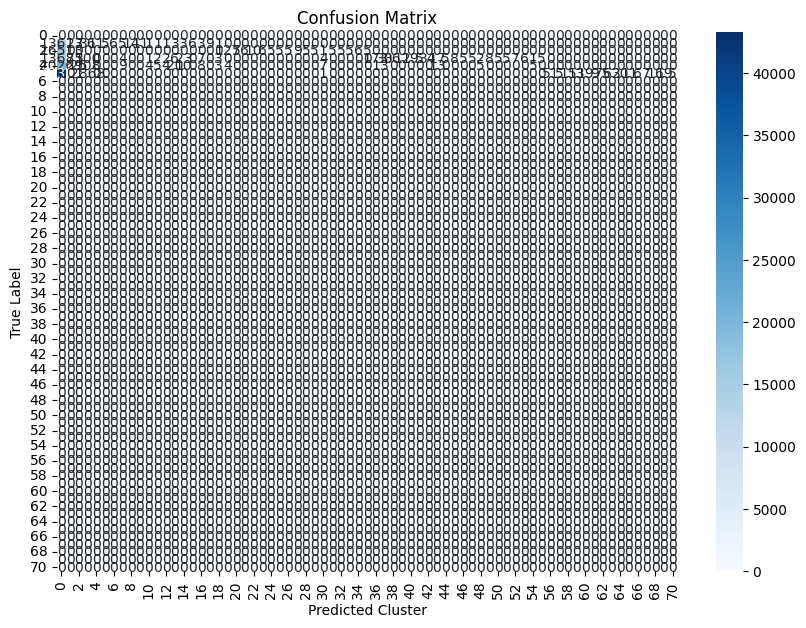

In [33]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # حساب المصفوفة الالتباس (Confusion Matrix)
# conf_matrix = confusion_matrix(df['targe'], df['cluster'])

# # عرض المصفوفة باستخدام heatmap
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Cluster')
# plt.ylabel('True Label')
# plt.show()
